In [108]:
!pip install graphviz

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import graphviz

In [2]:
#read X_train first 3 rows for header
df_X_header = pd.read_csv("X_train.csv", dtype = str, nrows = 3,header = None)

#combine df_X_header by row
X_header = []
for ic in range(len(df_X_header.columns)):
    temp = ""
    for ir in range(len(df_X_header)):
        if(ir != 0):
            temp += "&"
        temp += df_X_header.iloc[ir,ic]
    X_header.append(temp)
    


#read X_train csv files except first 3 rows 
X_train = pd.read_csv("X_train.csv",
                         skiprows = 3,
                         header = None)

X_valid = pd.read_csv("X_valid.csv",
                          skiprows = 3,
                          header = None)

#combine header and the data together
X_train.columns = X_header

#read Y_train csv file
Y_train = pd.read_csv("Y_train.csv")
Y_valid = pd.read_csv("Y_valid.csv")

In [3]:
X_id = X_train.iloc[:,0]
X_feat = X_train.iloc[:,1:]
print(X_train.shape)
print(X_id.shape)
print(X_feat.shape)
print(Y_train.shape)

(16760, 7489)
(16760,)
(16760, 7488)
(16760, 2)


In [4]:
def featureSelectByMean(df_feat,df_header,cols = None):
    if (cols == None):
        cols = np.full((df_feat.shape[1],), False, dtype = bool)
    for ic in range(len(df_header.columns)):
        if (df_header.iloc[1,ic] == "mean"):
            cols[ic] = True
    
    print("Select features with mean value:")
    print("Original:",df_feat.shape[1],"\tSelected:",np.sum(cols))        
    return df_feat.iloc[:,cols]
    

X_feat = featureSelectByMean(X_feat,df_X_header)
X_feat.describe()

Select features with mean value:
Original: 7488 	Selected: 2496


,alanine aminotransferase&mean&1,alanine aminotransferase&mean&2,alanine aminotransferase&mean&3,alanine aminotransferase&mean&4,alanine aminotransferase&mean&5,alanine aminotransferase&mean&6,alanine aminotransferase&mean&7,alanine aminotransferase&mean&8,alanine aminotransferase&mean&9,alanine aminotransferase&mean&10,...,white blood cell count urine&mean&15,white blood cell count urine&mean&16,white blood cell count urine&mean&17,white blood cell count urine&mean&18,white blood cell count urine&mean&19,white blood cell count urine&mean&20,white blood cell count urine&mean&21,white blood cell count urine&mean&22,white blood cell count urine&mean&23,white blood cell count urine&time_since_measured&0
count,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,...,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000
mean,-0.065219,-0.064588,-0.064803,-0.064101,-0.064031,-0.063712,-0.063905,-0.064175,-0.064640,-0.064856,...,-0.000300,-0.000252,-0.000329,-0.000262,-0.000249,-0.000257,-0.000282,-0.000300,-0.000448,269.869093
std,0.423142,0.428927,0.427698,0.435464,0.436145,0.438468,0.435569,0.432840,0.426678,0.420549,...,0.339446,0.338852,0.338696,0.338709,0.338702,0.338702,0.338711,0.338711,0.338265,315.670695
min,-0.279057,-0.279057,-0.279057,-0.279057,-0.279057,-0.279057,-0.279057,-0.279057,-0.279057,-0.279057,...,-0.316046,-0.316046,-0.316046,-0.316046,-0.316046,-0.316046,-0.316046,-0.316046,-0.316046,0.000000
25%,-0.248043,-0.248043,-0.248043,-0.248043,-0.248043,-0.248043,-0.248043,-0.248043,-0.248043,-0.248043,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,57.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,154.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,360.000000
max,10.413320,10.413320,10.413320,10.413320,10.413320,10.413320,10.413320,10.413320,10.413320,10.413320,...,11.783246,11.783246,11.783246,11.783246,11.783246,11.783246,11.783246,11.783246,11.783246,2232.000000


In [5]:
def featureSelectByCorr(df_feat,threshold = 0.9):
    corr = df_feat.corr()
    
    cols = np.full((corr.shape[0],), True, dtype = bool)
    for i in range(corr.shape[0],0,-1):
        for j in range(i+1, corr.shape[0]):
            if corr.iloc[i,j] >= threshold:
                if(cols[j]):
                    cols[j] = False
    print("Select features by filtering features with high covariance","(>= "+str(threshold)+")",":")
    print("Original:",df_feat.shape[1],"\tSelected:",np.sum(cols))
    
    return df_feat.iloc[:,cols]

X_feat = featureSelectByCorr(X_feat,0.9)
X_feat.describe()

Select features by filtering features with high covariance (>= 0.9) :
Original: 2496 	Selected: 397


,alanine aminotransferase&mean&1,alanine aminotransferase&mean&2,alanine aminotransferase&time_since_measured&0,albumin&mean&1,albumin&time_since_measured&0,albumin ascites&mean&1,albumin ascites&time_since_measured&0,albumin pleural&mean&1,albumin pleural&time_since_measured&0,albumin urine&mean&1,...,total protein urine&time_since_measured&0,troponin-i&mean&1,troponin-t&mean&1,troponin-t&time_since_measured&0,venous pvo2&mean&1,weight&mean&1,weight&time_since_measured&0,white blood cell count&mean&1,white blood cell count urine&mean&1,white blood cell count urine&time_since_measured&0
count,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,1.676000e+04,16760.000000,16760.000000,16760.000000,1.676000e+04,...,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000
mean,-0.065219,-0.064588,33.225000,0.034359,46.030847,1.848164e-18,6915.172375,0.000044,8732.591826,7.286667e-20,...,1559.202029,-0.002609,-0.025065,69.243735,-0.000489,-0.014655,27.429415,0.001104,-0.000158,269.869093
std,0.423142,0.428927,38.602299,0.619799,50.040251,5.462116e-02,6261.763074,0.051822,8127.378115,5.516467e-02,...,1779.006089,0.168234,0.504190,85.521628,0.123559,0.812038,35.051215,0.962887,0.338099,315.670695
min,-0.279057,-0.279057,0.000000,-3.131888,0.000000,-1.702985e+00,0.000000,-2.312068,0.000000,-5.691630e-01,...,0.000000,-0.692272,-0.366371,0.000000,-2.765677,-3.517696,0.000000,-1.160785,-0.316046,0.000000
25%,-0.248043,-0.248043,0.000000,0.000000,11.000000,0.000000e+00,2157.000000,0.000000,2232.750000,0.000000e+00,...,398.000000,0.000000,0.000000,11.000000,0.000000,-0.405690,2.000000,-0.414731,0.000000,57.000000
50%,0.000000,0.000000,23.000000,0.000000,25.000000,0.000000e+00,5146.000000,0.000000,6192.000000,0.000000e+00,...,984.000000,0.000000,0.000000,41.000000,0.000000,0.000000,21.000000,-0.120972,0.000000,154.000000
75%,0.000000,0.000000,48.000000,0.000000,69.000000,0.000000e+00,9888.000000,0.000000,13056.000000,0.000000e+00,...,2034.250000,0.000000,0.000000,96.000000,0.000000,0.122018,33.000000,0.228741,0.000000,360.000000
max,10.413320,10.413320,336.000000,3.492301,480.000000,3.469357e+00,31735.000000,1.613770,36853.000000,4.592960e+00,...,11424.000000,3.830272,8.913147,768.000000,3.207278,7.198578,431.000000,54.802581,11.783246,2232.000000


In [6]:
X_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16760 entries, 0 to 16759
Columns: 397 entries, alanine aminotransferase&mean&1 to white blood cell count urine&time_since_measured&0
dtypes: float64(397)
memory usage: 50.8 MB


In [7]:
X_feat.head()

,alanine aminotransferase&mean&1,alanine aminotransferase&mean&2,alanine aminotransferase&time_since_measured&0,albumin&mean&1,albumin&time_since_measured&0,albumin ascites&mean&1,albumin ascites&time_since_measured&0,albumin pleural&mean&1,albumin pleural&time_since_measured&0,albumin urine&mean&1,...,total protein urine&time_since_measured&0,troponin-i&mean&1,troponin-t&mean&1,troponin-t&time_since_measured&0,venous pvo2&mean&1,weight&mean&1,weight&time_since_measured&0,white blood cell count&mean&1,white blood cell count urine&mean&1,white blood cell count urine&time_since_measured&0
0,-0.254460,-0.254460,0.0,-1.979855,0.0,0.0,100.0,0.0,100.0,0.0,...,100.0,0.0,0.000000,100.0,0.0,1.026004,100.0,0.214086,0.160067,100.0
1,-0.256599,-0.256599,0.0,-0.251806,0.0,0.0,100.0,0.0,100.0,0.0,...,100.0,0.0,0.000000,100.0,0.0,0.000000,3.0,-0.181589,0.000000,16.0
2,-0.269432,-0.269432,24.0,0.000000,24.0,0.0,100.0,0.0,100.0,0.0,...,100.0,0.0,0.000000,100.0,0.0,0.000000,27.0,-0.470685,0.000000,40.0
3,0.000000,0.000000,4.0,0.000000,48.0,0.0,100.0,0.0,100.0,0.0,...,100.0,0.0,0.000000,100.0,0.0,0.000000,51.0,-0.302823,0.000000,64.0
4,0.000000,0.000000,28.0,0.000000,72.0,0.0,100.0,0.0,100.0,0.0,...,100.0,0.0,-0.317391,0.0,0.0,0.000000,75.0,-0.414731,0.000000,88.0


In [8]:
Y_train

,Unnamed: 0,mort_icu
0,3_145834_211552,0
1,6_107064_228232,0
2,9_150750_220597,1
3,11_194540_229441,0
4,12_112213_232669,0
...,...,...
16755,99966_167228_252173,0
16756,99973_150202_275083,0
16757,99982_151454_221194,0
16758,99991_151118_226241,0


In [9]:
X_feat

,alanine aminotransferase&mean&1,alanine aminotransferase&mean&2,alanine aminotransferase&time_since_measured&0,albumin&mean&1,albumin&time_since_measured&0,albumin ascites&mean&1,albumin ascites&time_since_measured&0,albumin pleural&mean&1,albumin pleural&time_since_measured&0,albumin urine&mean&1,...,total protein urine&time_since_measured&0,troponin-i&mean&1,troponin-t&mean&1,troponin-t&time_since_measured&0,venous pvo2&mean&1,weight&mean&1,weight&time_since_measured&0,white blood cell count&mean&1,white blood cell count urine&mean&1,white blood cell count urine&time_since_measured&0
0,-0.254460,-0.254460,0.0,-1.979855,0.0,0.0,100.0,0.0,100.0,0.0,...,100.0,0.0,0.000000,100.0,0.0,1.026004,100.0,0.214086,0.160067,100.0
1,-0.256599,-0.256599,0.0,-0.251806,0.0,0.0,100.0,0.0,100.0,0.0,...,100.0,0.0,0.000000,100.0,0.0,0.000000,3.0,-0.181589,0.000000,16.0
2,-0.269432,-0.269432,24.0,0.000000,24.0,0.0,100.0,0.0,100.0,0.0,...,100.0,0.0,0.000000,100.0,0.0,0.000000,27.0,-0.470685,0.000000,40.0
3,0.000000,0.000000,4.0,0.000000,48.0,0.0,100.0,0.0,100.0,0.0,...,100.0,0.0,0.000000,100.0,0.0,0.000000,51.0,-0.302823,0.000000,64.0
4,0.000000,0.000000,28.0,0.000000,72.0,0.0,100.0,0.0,100.0,0.0,...,100.0,0.0,-0.317391,0.0,0.0,0.000000,75.0,-0.414731,0.000000,88.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16755,0.000000,0.000000,24.0,1.044231,24.0,0.0,13486.0,0.0,17616.0,0.0,...,86.0,0.0,-0.361918,48.0,0.0,0.584864,22.0,-0.144286,0.000000,72.0
16756,0.000000,0.000000,48.0,0.000000,18.0,0.0,13510.0,0.0,17640.0,0.0,...,110.0,0.0,-0.366371,0.0,0.0,0.973702,23.0,0.452557,0.000000,96.0
16757,-0.260876,-0.260876,72.0,1.044231,42.0,0.0,13534.0,0.0,17664.0,0.0,...,134.0,0.0,0.000000,22.0,0.0,-0.443803,23.0,-0.682067,0.000000,120.0
16758,0.000000,0.000000,11.0,0.000000,21.0,0.0,13558.0,0.0,17688.0,0.0,...,158.0,0.0,0.000000,46.0,0.0,0.781214,0.0,-0.633884,-0.303768,0.0


In [27]:
#Task 2
#Pass the score_function ‘f_classif’ and the number of features you want to keep in the ‘SelectKBest’ function and fit the X and y to the function:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
uni = SelectKBest(score_func = f_classif, k = 5) #input the number of features, k=398 means we want to see the best 398 selection
fit = uni.fit(X_feat, Y_train.iloc[:,1])

In [28]:
#Get the feature name(s)
X_feat.columns[fit.get_support(indices=True)].tolist()


['anion gap&mean&1',
 'blood urea nitrogen&mean&1',
 'glascow coma scale total&mean&1',
 'lactate&mean&1',
 'lactic acid&mean&1']

<AxesSubplot:xlabel='lactate&mean&1', ylabel='mort_icu'>

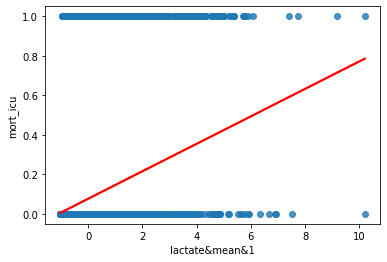

In [12]:
#plot the scatterplot of the feature chosen with a regression line
import seaborn as sns
sns.regplot(x=X_feat['lactate&mean&1'], y=Y_train['mort_icu'], ci=None, line_kws={"color": "red"})

In [13]:
#get the array of two variable
a=np.array(X_feat[['lactate&mean&1']])
b=np.array(Y_train[['mort_icu']])

In [14]:
#fit the regression model and get the rmse_test value
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(a,b)
print("Slope of the Regression Line is : ", lm.coef_)
print("Intercept of Regression Line is : ",lm.intercept_)
from sklearn.metrics import mean_squared_error
pred_test = lm.predict(a)
rmse_test = mean_squared_error(b, pred_test, squared=False)
print("MSE of Linear Regression on testing data is : ",rmse_test)

Slope of the Regression Line is :  [[0.06948778]]
Intercept of Regression Line is :  [0.076688]
MSE of Linear Regression on testing data is :  0.2563863592505499


<AxesSubplot:xlabel='lactic acid&mean&1', ylabel='mort_icu'>

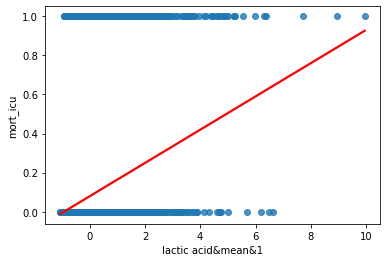

In [15]:
sns.regplot(x=X_feat['lactic acid&mean&1'], y=Y_train['mort_icu'], ci=None, line_kws={"color": "red"})

In [16]:
#now try another feature
c=np.array(X_feat[['blood urea nitrogen&mean&1']])
lm1 = LinearRegression()
lm1.fit(c,b)
print("Slope of the Regression Line is : ", lm1.coef_)
print("Intercept of Regression Line is : ",lm1.intercept_)
from sklearn.metrics import mean_squared_error
pred_test = lm1.predict(c)
rmse_test = mean_squared_error(b, pred_test, squared=False)
print("MSE of Linear Regression on testing data is : ",rmse_test)


Slope of the Regression Line is :  [[0.08512576]]
Intercept of Regression Line is :  [0.07905631]
MSE of Linear Regression on testing data is :  0.25650295540985124


<AxesSubplot:xlabel='blood urea nitrogen&mean&1', ylabel='mort_icu'>

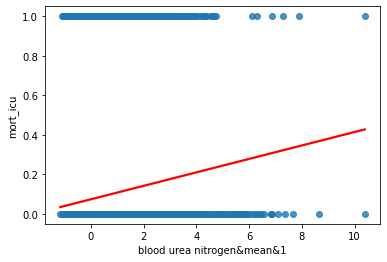

In [29]:
sns.regplot(x=X_feat['blood urea nitrogen&mean&1'], y=Y_train['mort_icu'], ci=None, line_kws={"color": "red"})

In [30]:
d=np.array(X_feat[['blood urea nitrogen&mean&1']])
lm2 = LinearRegression()
lm2.fit(d,b)
print("Slope of the Regression Line is : ", lm2.coef_)
print("Intercept of Regression Line is : ",lm2.intercept_)
from sklearn.metrics import mean_squared_error
pred_test = lm2.predict(d)
rmse_test = mean_squared_error(b, pred_test, squared=False)
print("MSE of Linear Regression on testing data is : ",rmse_test)

Slope of the Regression Line is :  [[0.03405239]]
Intercept of Regression Line is :  [0.07399564]
MSE of Linear Regression on testing data is :  0.25820198367571695
